# Masterchef Brasil 2023

## Data analysis and Clustering

In [25]:
!pip install mysql-connector-python

# SQL Database

In [27]:
# SQL DataBase
import mysql.connector
from mysql.connector import Error

In [50]:
# Import Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [28]:
# Senha utilizada para me conectar ao MySQL server
password = "Example"

In [29]:
# Connecting to MySQL Database

def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            password = user_password,
            auth_plugin='mysql_native_password'

        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

mydb = create_server_connection("127.0.0.1","root", password)

MySQL Database connection successful


In [30]:
# Creating new database
def create_database(connection, query):
    
    mycursor = connection.cursor()
    
    try:
        mycursor.execute(query)
        print("Database created sucessfully")
    except Error as err:
        print(f"Error: '{err}'")
        
    
create_database_query = "CREATE DATABASE MasterchefBrasil"  
db_name = create_database(mydb, create_database_query)

Error: '1007 (HY000): Can't create database 'masterchefbrasil'; database exists'


In [29]:
# Connection to the database

def create_database_connection(host_name, user_name, user_password, database):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            password = user_password,
            auth_plugin='mysql_native_password',
            database = "MasterchefBrasil"
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")
    return connection

mydb = create_database_connection("127.0.0.1","root", password, "MasterchefBrasil")

MySQL Database connection successful


In [30]:
# Function to execute queries

def execute_query(connection, query):
    
    mycursor = connection.cursor()
        
    try:
        mycursor.execute(query)
        connection.commit()
        print("Query sucessful")
    except Error as err:
        print(f"Error: '{err}'")

In [31]:
# Reading query

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    
    except Error as err:
        print(f"Error: '{err}'")

In [32]:
# Reading database test

db = "df_masterchefbrasil"

q1 = """
SELECT *
FROM df_masterchefbrasil;
"""

results = read_query(mydb, q1)

for result in results:
  print(result)

(datetime.datetime(2023, 5, 23, 0, 0), 6, 'Ashanti', '', 4, 'Eliminação', 2, 1)
(datetime.datetime(2023, 5, 23, 0, 0), 8, 'Camila', '', 4, 'Eliminação', 2, 3)
(datetime.datetime(2023, 5, 23, 0, 0), 7, 'Danilo', 'Ganhador', 4, 'Eliminação', 2, 2)
(datetime.datetime(2023, 5, 23, 0, 0), 11, 'Neylano', 'Eliminado', 4, 'Eliminação', 3, 1)
(datetime.datetime(2023, 5, 23, 0, 0), 14, 'Wilton', '', 4, 'Eliminação', 3, 4)
(datetime.datetime(2023, 5, 23, 0, 0), 12, 'Dielen', '', 4, 'Eliminação', 3, 2)
(datetime.datetime(2023, 5, 23, 0, 0), 13, 'Stephanie', '', 4, 'Eliminação', 3, 3)
(datetime.datetime(2023, 5, 30, 0, 0), 15, 'Gizele', '', 5, 'Eliminação', 3, 5)
(datetime.datetime(2023, 5, 30, 0, 0), 7, 'Wilton', 'Ganhador', 5, 'Eliminação', 2, 2)
(datetime.datetime(2023, 5, 30, 0, 0), 6, 'Danilo', 'Eliminado', 5, 'Eliminação', 2, 1)
(datetime.datetime(2023, 5, 30, 0, 0), 8, 'Seiji', '', 5, 'Eliminação', 2, 3)
(datetime.datetime(2023, 5, 30, 0, 0), 9, 'Leonardo', '', 5, 'Eliminação', 2, 4)
(dateti

In [9]:
# Formating outputs into a list
def output_to_dataframe(results, columns):
    from_db = []
    for row in results:
        row = list(row)
        from_db.append(row)
        
    df = pd.DataFrame(from_db, columns = columns)
    
    return df

In [33]:
columns = ["Data", "Mesa", "Participante", "Ganhador_ou_Perdedor", "Episodio", "Prova", "ProximidadeMezanino", "ProximidadeJurados"]

df_Masterchef = output_to_dataframe(results, columns)


In [34]:
display(df_Masterchef)

,Data,Mesa,Participante,Ganhador_ou_Perdedor,Episodio,Prova,ProximidadeMezanino,ProximidadeJurados
0,2023-05-23,6.0,Ashanti,,4,Eliminação,2.0,1.0
1,2023-05-23,8.0,Camila,,4,Eliminação,2.0,3.0
2,2023-05-23,7.0,Danilo,Ganhador,4,Eliminação,2.0,2.0
3,2023-05-23,11.0,Neylano,Eliminado,4,Eliminação,3.0,1.0
4,2023-05-23,14.0,Wilton,,4,Eliminação,3.0,4.0
...,...,...,...,...,...,...,...,...
126,2023-08-21,NaN,Jucyleia,Mezanino,17,Prova inicial,NaN,NaN
127,2023-08-29,NaN,Luma,Ganhador,18,Prova inicial,NaN,NaN
128,2023-09-05,NaN,Wilton,Ganhador,19,Prova inicial,NaN,NaN
129,2023-09-12,NaN,Ana Carolina,Ganhador,20,Prova inicial,NaN,NaN


## Exploratory Data Analysis

### Analysis of the participation of each table in the elimination tests
As someone who always watch this tv program I always questioned if the contestants in the Mezzanine that help the contestants on the elimination test gave any advantage on the test. So, we are going to analyze this.

In [73]:
q3 = """
SELECT Mesa, 
    COUNT(Mesa) AS 'Contagem de Participação da Mesa em Eliminações',
    SUM(CASE WHEN Ganhador_ou_Perdedor = 'Eliminado' THEN 1 ELSE 0 END) as 'Nº de Perdas',
    SUM(CASE WHEN IFNULL(Ganhador_ou_Perdedor,0) != 'Eliminado' THEN 1 ELSE 0 END) as 'Nº de Sucessos'
FROM df_masterchefbrasil
WHERE Prova = 'Eliminação'
GROUP BY Mesa;
"""

result_q3 = read_query(mydb, q3)

df_contagem_mesa_eliminação = output_to_dataframe(result_q3, ["Mesa", "Contagem de Participação em Eliminações", "Nº de Perdas", "Nº de Sucessos"])

display(df_contagem_mesa_eliminação)

,Mesa,Contagem de Participação em Eliminações,Nº de Perdas,Nº de Sucessos
0,6,12,3,9
1,8,9,0,9
2,7,11,2,9
3,11,15,3,12
4,14,9,1,8
5,12,15,3,12
6,13,14,4,10
7,15,3,0,3
8,9,2,0,2


1) **Loss rate per table (%)**: I need to know how many people were defeated at these tables throughout the entire program. To analyze this, I need to normalize the data by creating a 'loss rate per table'. In other words, the amount of evidence lost per table. Races are considered lost when the participant was unable to win the race and was eliminated.

2) **Success rate per table (%)**: Now, I need to know how many people were not defeated at these tables throughout the entire program. To analyze this, I need to normalize the data by creating a 'success rate per table'. In other words, the number of tests in which the participant was not eliminated per table. Success is considered when the participant was not eliminated and was able to continue participating in the program.

3) After calculating the rates, they will be analyzed based on the proximity of the table to the Mezzanine. The proximity ranges from 1 to 3, as shown in the image:

![Metodologia de análise das mesas no projeto](Projeto_Masterchef_Metodologia.png "Table analysis methodology")

In [13]:
q6 = """
SELECT Mesa,
    COUNT(Mesa) as 'Contagem de Participação da Mesa em Eliminações',
    (SUM(CASE WHEN IFNULL(Ganhador_ou_Perdedor, 0) != 'Eliminado' THEN 1 ELSE 0 END)/COUNT(Mesa))*100 as 'Taxa de sucesso por mesa',
    (SUM(CASE WHEN Ganhador_ou_Perdedor = 'Eliminado' THEN 1 ELSE 0 END)/COUNT(Mesa))*100 as 'Taxa de perdas por mesa',
    AVG(ProximidadeMezanino) as 'Proximidade da mesa em relação ao Mezanino',
    AVG(ProximidadeJurados) as 'Proximidade da mesa em relação aos Jurados'
FROM df_masterchefbrasil
WHERE Prova = 'Eliminação'
GROUP BY Mesa
"""

results_q6 = read_query(mydb, q6)

df_taxas = output_to_dataframe(results_q6, ["Mesa", "Contagem de Participação da Mesa em Eliminações", "Taxa de sucesso por mesa (%)","Taxa de perdas por mesa (%)", "Proximidade da mesa em relação ao Mezanino", "Proximidade da mesa em relação aos Jurados"])

display(df_taxas)

,Mesa,Contagem de Participação da Mesa em Eliminações,Taxa de sucesso por mesa (%),Taxa de perdas por mesa (%),Proximidade da mesa em relação ao Mezanino,Proximidade da mesa em relação aos Jurados
0,6,12,75.0000,25.0000,2.0000,1.0000
1,8,9,100.0000,0.0000,2.0000,3.0000
2,7,11,81.8182,18.1818,2.0000,2.0000
3,11,15,80.0000,20.0000,3.0000,1.0000
4,14,9,88.8889,11.1111,3.0000,4.0000
5,12,15,80.0000,20.0000,3.0000,2.0000
6,13,14,71.4286,28.5714,3.0000,3.0000
7,15,3,100.0000,0.0000,3.0000,5.0000
8,9,2,100.0000,0.0000,2.0000,4.0000


### Is there a correlation between the proximity of the Mezzanine and the success rate?
To verify this, a scatterplot will be analyzed relating the number of wins and the table used in the television program.
As we can see below, tables with proximity equals to 3 have a high success rate, even more than tables close to the Mezzanine. So there does not appear to be a relationship between proximity to the mezzanine and the number of wins. 

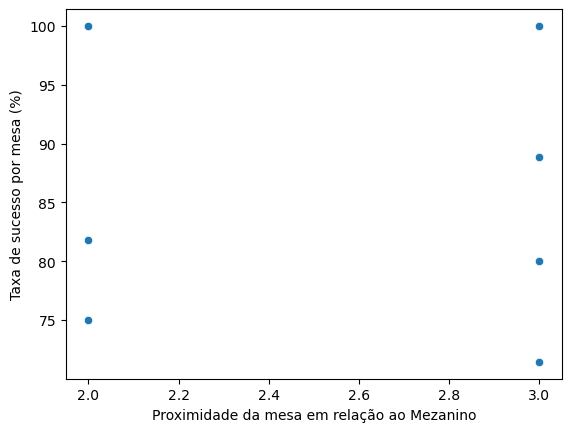

In [14]:
g1 = sns.scatterplot(x="Proximidade da mesa em relação ao Mezanino", y=r"Taxa de sucesso por mesa (%)", data = df_taxas)

### The number of tests can influence the number of tests won?
This is almost obvious since someone who were eliminated can't win tests and someone who stayed has more chance of winning tests. But, let's check anyway:

In [24]:
q7 = """
SELECT Participante,
    COUNT(Participante) AS 'Eliminações realizadas',
    (COUNT(Participante)/(SELECT COUNT(DISTINCT Episodio) FROM df_masterchefbrasil))*100 AS 'Participacao',
    (SUM(CASE WHEN IFNULL(Ganhador_ou_Perdedor,0) != 'Eliminado' THEN 1 ELSE 0 END)) AS 'Sucessos',
    (SUM(CASE WHEN Ganhador_ou_Perdedor = 'Ganhador' THEN 1 ELSE 0 END)) AS 'Provas ganhas'
FROM df_masterchefbrasil
WHERE Prova = 'Eliminação'
GROUP BY Participante
ORDER BY Participacao DESC
"""

results_q7 = read_query(mydb,q7)

participacao_eliminacoes = output_to_dataframe(results_q7, ["Participante", "Nº de eliminações", r"Participação em eliminações (%)", "Nº de Sucessos", "Eliminações ganhas"])

In [25]:
display(participacao_eliminacoes)

,Participante,Nº de eliminações,Participação em eliminações (%),Nº de Sucessos,Eliminações ganhas
0,Wilton,9,60.0000,9,2
1,Ana Carolina,9,60.0000,9,5
2,Danilo,8,53.3333,6,2
3,Dielen,7,46.6667,6,1
4,Gizele,7,46.6667,6,1
5,Seiji,7,46.6667,6,0
6,Jucyleia,7,46.6667,7,2
7,Emanuel,7,46.6667,6,2
8,Ashanti,4,26.6667,3,0
9,Camila,4,26.6667,3,0


As we can see in the scatterplot below, the number of tests in the tv program is directly proporcional to the number of tests won:

<AxesSubplot:xlabel='Participação em eliminações (%)', ylabel='Nº de Sucessos'>

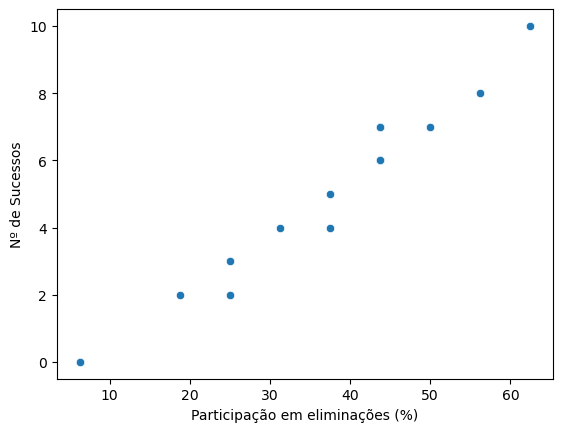

In [77]:
# Scatterplot

sns.scatterplot(x = r'Participação em eliminações (%)', 
                y = "Nº de Sucessos",
                data = participacao_eliminacoes
               )

# Unsupervised Machine Learning: Clustering
Since we have completed the exploratory data analysis, we will use **Clustering**, an unsupervised machine learning technique, to separate participants into groups according to the number of wins and the number of elimination tests performed.

In [35]:
query_kmeans = """
SELECT Participante,
    SUM(CASE WHEN Ganhador_ou_Perdedor = 'Ganhador' THEN 1 ELSE 0 END) AS 'Número de vitórias',
    SUM(CASE WHEN Prova = 'Eliminação' THEN 1 ELSE 0 END) AS 'Nº de provas de eliminação'
FROM df_masterchefbrasil
GROUP BY Participante"""

In [36]:
df_kmeans = output_to_dataframe(read_query(mydb, query_kmeans),['Participante', 'Número de vitórias', 'Nº de provas de eliminação'])
display(df_kmeans)

,Participante,Número de vitórias,Nº de provas de eliminação
0,Ashanti,1,4
1,Camila,0,4
2,Danilo,2,8
3,Neylano,0,1
4,Wilton,3,9
5,Dielen,1,7
6,Stephanie,0,4
7,Gizele,1,7
8,Seiji,0,7
9,Leonardo,0,3


In [37]:
df_kmeans.set_index('Participante', inplace = True)
display(df_kmeans)

,Número de vitórias,Nº de provas de eliminação
Participante,,
Ashanti,1,4
Camila,0,4
Danilo,2,8
Neylano,0,1
Wilton,3,9
Dielen,1,7
Stephanie,0,4
Gizele,1,7
Seiji,0,7


## K-means Clustering
### Data  Treatment
Remove null values and normalize the data

In [38]:
# There are no null values to remove:
df_kmeans.describe()

,Número de vitórias,Nº de provas de eliminação
count,18,18
unique,5,7
top,0,4
freq,8,5


In [39]:
# Scaler
scaler = StandardScaler()

In [40]:
# Fit the scaler to the data
df_kmeans[['Número de vitórias_S', 'Nº de provas de eliminação_S']]=scaler.fit_transform(df_kmeans[['Número de vitórias', 'Nº de provas de eliminação']])
display(df_kmeans)

,Número de vitórias,Nº de provas de eliminação,Número de vitórias_S,Nº de provas de eliminação_S
Participante,,,,
Ashanti,1,4,-0.143592,-0.387298
Camila,0,4,-0.789754,-0.387298
Danilo,2,8,0.502571,1.161895
Neylano,0,1,-0.789754,-1.549193
Wilton,3,9,1.148733,1.549193
Dielen,1,7,-0.143592,0.774597
Stephanie,0,4,-0.789754,-0.387298
Gizele,1,7,-0.143592,0.774597
Seiji,0,7,-0.789754,0.774597


## Value of K
Defining the value of k through elbow chart:

When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters. In this case, the number of clusters should be k = 3.

In [70]:
def define_ideal_k(data, max_k):
    k_means = []
    inertias = []
    
    for k in range(1,max_k):
        model = KMeans(n_clusters=k)
        model_kmeans = model.fit(data)
        
        k_means.append(k)
        inertias.append(model_kmeans.inertia_)
        
    # Generating elbow chart
    plt.plot(k_means, inertias, 'o-')
    plt.title('Elbow chart')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

C:\Users\beatr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


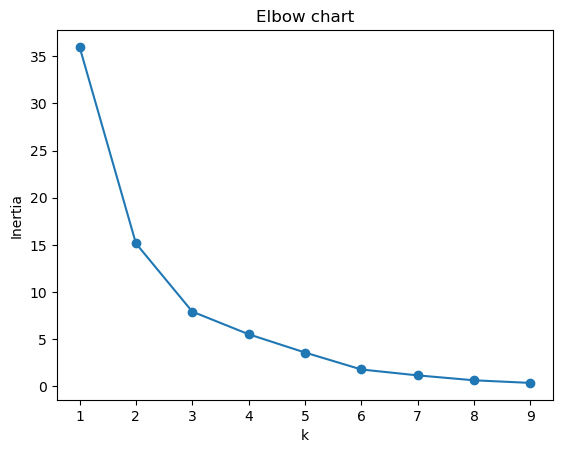

In [71]:
define_ideal_k(df_kmeans[['Número de vitórias_S', 'Nº de provas de eliminação_S']], 10)

## Model fit

K = 3

In [57]:
# Defining the model
model = KMeans(n_clusters = 3)

In [60]:
# Fitting the model

model.fit(df_kmeans[['Número de vitórias_S', 'Nº de provas de eliminação_S']])

KMeans(n_clusters=3)

In [64]:
df_kmeans['kmeans_3'] = model.labels_
display(df_kmeans)

,Número de vitórias,Nº de provas de eliminação,Número de vitórias_S,Nº de provas de eliminação_S,kmeans_3
Participante,,,,,
Ashanti,1,4,-0.143592,-0.387298,1
Camila,0,4,-0.789754,-0.387298,1
Danilo,2,8,0.502571,1.161895,0
Neylano,0,1,-0.789754,-1.549193,1
Wilton,3,9,1.148733,1.549193,0
Dielen,1,7,-0.143592,0.774597,0
Stephanie,0,4,-0.789754,-0.387298,1
Gizele,1,7,-0.143592,0.774597,0
Seiji,0,7,-0.789754,0.774597,0


## Dataviz

Text(0, 0.5, 'Nº de provas de eliminação')

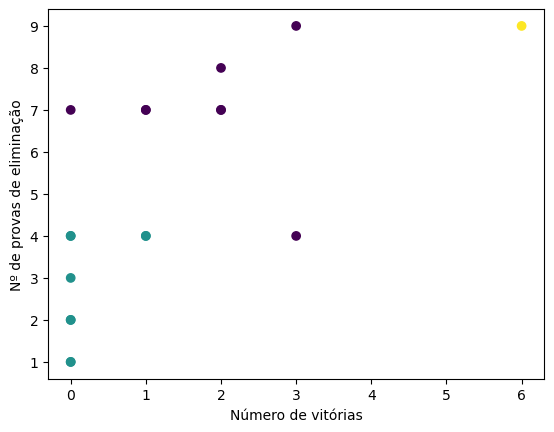

In [67]:
plt.scatter(x = df_kmeans['Número de vitórias'], y = df_kmeans['Nº de provas de eliminação'], c = df_kmeans['kmeans_3'])
plt.xlabel('Número de vitórias')
plt.ylabel('Nº de provas de eliminação')

The data was divided in 4 groups based on the number of eliminations and number of victories on Masterchef Brasil.